# CMSE 202 Final Project

#### Group Members: Brady, Toan, Sophie, Sultan, and Andy
#### November 17th, 2024

## *How Treasury Yields Predict Economic Recessions*

## Background & Motivations

Our group’s interest in financial markets and personal finance has inspired us to explore indicators that might help predict economic downturns. One question that consistently arises among investors and analysts is whether certain financial metrics, like Treasury yields, can offer early signals of an impending recession. Treasury yields, particularly the spread between long-term and short-term yields, have historically been used as potential recession indicators. By understanding more about the behavior of these yields, we aim to uncover insights that could be valuable not only for investors but also for anyone interested in the broader economy.

This project is especially relevant in today’s unpredictable financial climate, where understanding potential recession signals can aid in making informed financial decisions. Through our analysis, we hope to contribute to the ongoing discussion around yield metrics and their significance in economic forecasting.

## Part 1: Data Collection and Cleaning

Package importing for the entirety of the project

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We started our project by collecting data from the US Government. Most of the historical information we needed was contained on federal platforms. We collected several different yield trends for different maturity dates as well as US GDP data. All of this information was listed in csv files.

In [73]:
yr1 = pd.read_csv('data/DGS1.csv')
yr10 = pd.read_csv('data/DGS10.csv')
mo1 = pd.read_csv('data/DGS1MO.csv')
yr20 = pd.read_csv('data/DGS20.csv')
yr30 = pd.read_csv('data/DGS30.csv')
mo3 = pd.read_csv('data/DGS3MO.csv')
mo6 = pd.read_csv('data/DGS6MO.csv')
yr1.head()

,DATE,DGS1
0,1965-11-01,4.350
1,1965-11-02,.
2,1965-11-03,4.360
3,1965-11-04,4.380
4,1965-11-05,4.380


We quickly noticed that the yield data tracked back to different years. We realized that trimmed data that was all on the same timeline was crucial for proper analysis. The one-month yield started at the most recent date, having its first full year starting in 2002. Also, the data contain missing values, which need to be cleaned before further analysis

In [77]:
# Function to clean datasets
def clean_dataset(df, target_column):
    # Filter by date
    df = df[df['DATE'] >= '2002-01-01'].copy()  
    
    # Convert the 'DATE' column to DateTime format 
    df.loc[:, 'DATE'] = pd.to_datetime(df['DATE'])
    
    # Replace '.' with NaN
    df.loc[:, target_column] = df[target_column].replace('.', np.nan)
    
    # Convert the column to numeric
    df.loc[:, target_column] = pd.to_numeric(df[target_column], errors='coerce')
    
    # Drop NaN values
    df.dropna(subset=[target_column], inplace=True)
    
    return df

# Clean each dataset 
yr1 = clean_dataset(yr1, 'DGS1')
yr10 = clean_dataset(yr10, 'DGS10')
mo1 = clean_dataset(mo1, 'DGS1MO')
yr20 = clean_dataset(yr20, 'DGS20')
yr30 = clean_dataset(yr30, 'DGS30')
mo3 = clean_dataset(mo3, 'DGS3MO')
mo6 = clean_dataset(mo6, 'DGS6MO')

yr1

,DATE,DGS1
9437,2002-01-02,2.28
9438,2002-01-03,2.24
9439,2002-01-04,2.25
9440,2002-01-07,2.19
9441,2002-01-08,2.19
...,...,...
15388,2024-10-24,4.25
15389,2024-10-25,4.29
15390,2024-10-28,4.28
15391,2024-10-29,4.29


Quarterly GDP data was necessary as a "recession" occurs after two consecutive quarters of gdp drops.

In [76]:
gdp = pd.read_csv('data/GDP.csv')
gdp

,DATE,GDP
0,2000-01-01,10002.179
1,2000-04-01,10247.720
2,2000-07-01,10318.165
3,2000-10-01,10435.744
4,2001-01-01,10470.231
...,...,...
94,2023-07-01,27967.697
95,2023-10-01,28296.967
96,2024-01-01,28624.069
97,2024-04-01,29016.714


## Part 2: Data Visualization

Plot of all monthly yield averages starting from 2002:

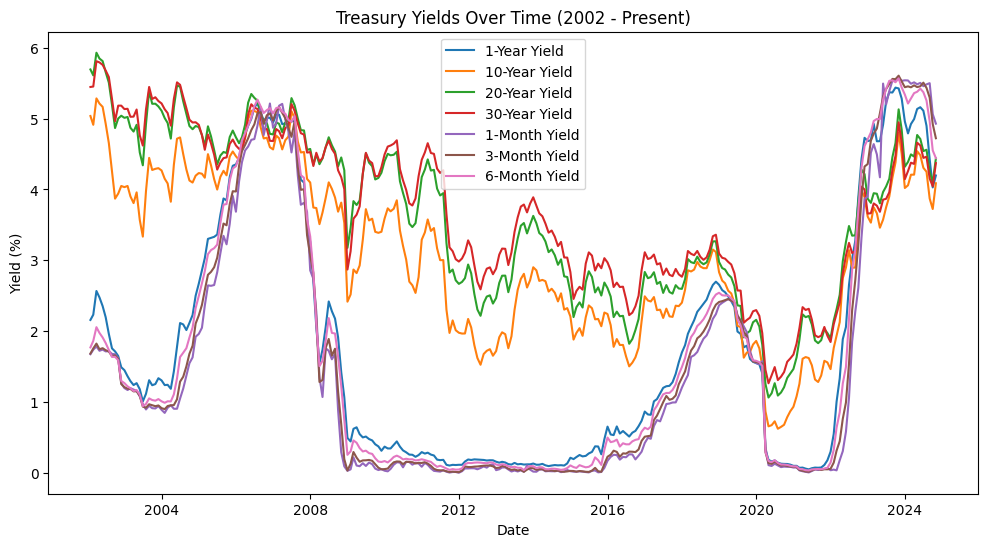

In [78]:
# Resample to monthly frequency, taking the mean of each month
yr1_monthly = yr1.resample('ME', on='DATE').mean()
yr10_monthly = yr10.resample('ME', on='DATE').mean()
yr20_monthly = yr20.resample('ME', on='DATE').mean()
yr30_monthly = yr30.resample('ME', on='DATE').mean()
mo1_monthly = mo1.resample('ME', on='DATE').mean()
mo3_monthly = mo3.resample('ME', on='DATE').mean()
mo6_monthly = mo6.resample('ME', on='DATE').mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yr1_monthly.index, yr1_monthly['DGS1'], label='1-Year Yield')
plt.plot(yr10_monthly.index, yr10_monthly['DGS10'], label='10-Year Yield')
plt.plot(yr20_monthly.index, yr20_monthly['DGS20'], label='20-Year Yield')
plt.plot(yr30_monthly.index, yr30_monthly['DGS30'], label='30-Year Yield')
plt.plot(mo1_monthly.index, mo1_monthly['DGS1MO'], label='1-Month Yield')
plt.plot(mo3_monthly.index, mo3_monthly['DGS3MO'], label='3-Month Yield')
plt.plot(mo6_monthly.index, mo6_monthly['DGS6MO'], label='6-Month Yield')

# Add labels and title
plt.title('Treasury Yields Over Time (2002 - Present)')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

#Source: ChatGPT 4.0
# Date Accessed: 11.4.2024
# Prompt: "Here is my dataframes and data labels. My code is getting a type error and I need to fix it. I am aiming to have all of the 
# yield info on one chat for display purposes."